In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import PchipInterpolator
import matplotlib.pyplot as plt
from scipy import signal

data = pd.read_csv('/content/drive/MyDrive/ECE695/data.csv')
data = data[5:-4]
data_I = data.iloc[:,2].values
data_Q = data.iloc[:,3].values

data_I = data_I.astype(float) * 3480 / (2 ** 20)
data_Q = data_Q.astype(float) * 3480 / (2 ** 20)

RMSE: 0.00
RMSE: 0.00


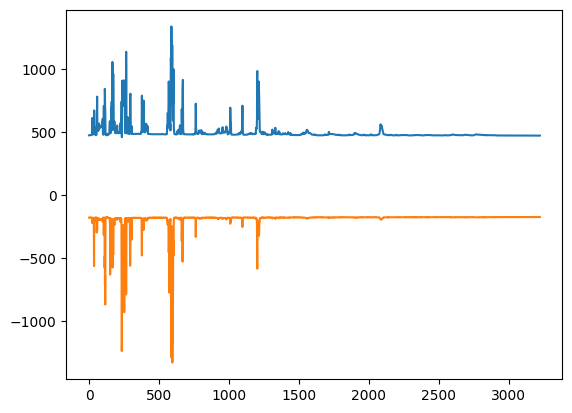

In [ ]:
nansI = np.isnan(data_I)
nansQ = np.isnan(data_Q)

I_func_pchip = PchipInterpolator(np.arange(len(data_I[~nansI])), data_I[~nansI])
Q_func_pchip = PchipInterpolator(np.arange(len(data_Q[~nansQ])), data_Q[~nansQ])

plt.plot(I_func_pchip(np.arange(len(data_I))))
plt.plot(Q_func_pchip(np.arange(len(data_Q))))

print(f'RMSE: {np.sqrt(np.average(np.square(data_I - I_func_pchip(np.arange(len(data_I)))))):.2f}')
print(f'RMSE: {np.sqrt(np.average(np.square(data_Q - Q_func_pchip(np.arange(len(data_Q)))))):.2f}')

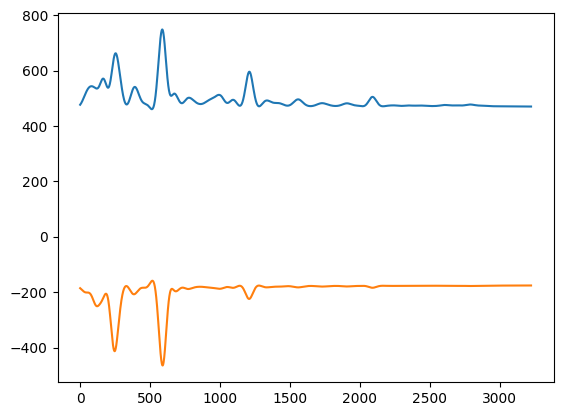

In [ ]:
b, a = signal.butter(3, 0.02)
I = signal.filtfilt(b, a, data_I)
Q = signal.filtfilt(b, a, data_Q)

plt.plot(I)
plt.plot(Q)

In [ ]:
from sklearn.neighbors import KernelDensity

kdeI = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(I.reshape(-1,1))
densityI = kdeI.score_samples(I.reshape(-1,1))

kdeQ = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(Q.reshape(-1,1))
densityQ = kdeQ.score_samples(Q.reshape(-1,1))

R = I[max(enumerate(densityI),key=lambda x: x[1])[0]]
Xc = Q[max(enumerate(densityQ),key=lambda x: x[1])[0]]

In [ ]:
Z = np.sqrt(np.square(np.average(I)) + np.square(np.average(Q)))
Pha = np.arctan2(np.average(Q),np.average(I))

print(f'R:    {R:.2f}  Ohms')
print(f'Xc:   {Xc:.2f} Ohms')
print(f'Z:    {Z:.2f}  Ohms')
print(f'Pha:  {Pha:.2f}    Radians')

R:    474.37  Ohms
Xc:   -176.95 Ohms
Z:    532.12  Ohms
Pha:  -0.37    Radians


In [ ]:
user_weight = 71
user_height = 174
user_age = 22
user_gender = 0

TBW = 0.87 + 0.43 * np.square(user_height) / R + 0.2 * user_weight
TBW_percent = TBW / user_weight
print(f'TBW (kg): {TBW:.2f}kg')
print(f'TBW (%) : {TBW_percent*100:.2f}%')
TBW = 1.726 + 0.5561 * np.square(user_height) / R + 0.0955 * user_weight
TBW_percent = TBW / user_weight
print(f'TBW (kg): {TBW:.2f}kg')
print(f'TBW (%) : {TBW_percent*100:.2f}%')
TBW = 5.82 + 0.446 * np.square(user_height) / R + 0.126 * user_weight
TBW_percent = TBW / user_weight
print(f'TBW (kg): {TBW:.2f}kg')
print(f'TBW (%) : {TBW_percent*100:.2f}%')
TBW = 6.53 + 0.3674 * np.square(user_height) / Z + 0.1753 * user_weight - 0.11 * user_age + 2.83 * user_gender
TBW_percent = TBW / user_weight
print(f'TBW (kg): {TBW:.2f}kg')
print(f'TBW (%) : {TBW_percent*100:.2f}%')
TBW = 4.65 + 0.377 * np.square(user_height) / R + 0.14 * user_weight - 0.08 * user_age + 2.9 * user_gender
TBW_percent = TBW / user_weight
print(f'TBW (kg): {TBW:.2f}kg')
print(f'TBW (%) : {TBW_percent*100:.2f}%')

TBW (kg): 42.51kg
TBW (%) : 59.88%
TBW (kg): 44.00kg
TBW (%) : 61.97%
TBW (kg): 43.23kg
TBW (%) : 60.89%
TBW (kg): 37.46kg
TBW (%) : 52.76%
TBW (kg): 36.89kg
TBW (%) : 51.96%
